In [75]:
import importlib

import mysklearn.myutils as myutils
import mysklearn.plotutils as plotutils
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers as myclassifiers
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyNaiveBayesClassifier

import mysklearn.myevaluation as myevaluation

In [44]:
spotify_table = MyPyTable()
spotify_table.load_from_file("./input_data/spotify_tracks.csv")
print("Number of instances:", len(spotify_table.data))

rows_to_remove = []
genre_row = spotify_table.get_column("track_genre")
genres = myutils.get_unique_values(genre_row)
print(genres)
for i in range(len(spotify_table.data)):
    if spotify_table.data[i][spotify_table.column_names.index("speechiness")] >= 0.85 and spotify_table.data[i][-1] in ["kids", "children", "comedy"]:
        rows_to_remove.append(i)
spotify_table.drop_rows(rows_to_remove)
print("number of instances with stories removed:", len(spotify_table.data))

Number of instances: 114000
['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian', 'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop', 'power-pop', 'progressive-house', 'psych-rock', 'punk-rock', 'punk', 'r-n-b', 'r

In [45]:
rows_to_remove = []
track_ids = []
for i in range(len(spotify_table.data)):
    if spotify_table.data[i][1] not in track_ids:
        track_ids.append(spotify_table.data[i][1])
    else:
        rows_to_remove.append(i)
spotify_table.drop_rows(rows_to_remove)
print("Number of instances with duplicates removed:", len(spotify_table.data))

Number of instances with duplicates removed: 89024


In [46]:
popularity_index_list = []
popularity_column = spotify_table.get_column("popularity")
for i in range(len(popularity_column)):
    popularity_index_list.append([popularity_column[i], i])
popularity_index_list = sorted(popularity_index_list)

rows_to_remove = [instance[1] for instance in popularity_index_list]
rows_to_remove = rows_to_remove[:(len(popularity_index_list) - 10000)]
spotify_table.drop_rows(rows_to_remove)
print("Final number of instances:", len(spotify_table.data))
print(spotify_table.data[:10])

Final number of instances: 10000
[[0.0, '5SuOikwiRyPMVoIQDJUgSV', 'Gen Hoshino', 'Comedy', 'Comedy', 73.0, 230666.0, 'False', 0.676, 0.461, 1.0, -6.746, 0.0, 0.143, 0.0322, 1.01e-06, 0.358, 0.715, 87.917, 4.0, 'acoustic'], [3.0, '6lfxq3CG4xtTiEg7opyCyx', 'Kina Grannis', 'Crazy Rich Asians (Original Motion Picture Soundtrack)', "Can't Help Falling In Love", 71.0, 201933.0, 'False', 0.266, 0.0596, 0.0, -18.515, 1.0, 0.0363, 0.905, 7.07e-05, 0.132, 0.143, 181.74, 3.0, 'acoustic'], [4.0, '5vjLSffimiIP26QG5WcN2K', 'Chord Overstreet', 'Hold On', 'Hold On', 82.0, 198853.0, 'False', 0.618, 0.443, 2.0, -9.681, 1.0, 0.0526, 0.469, 0.0, 0.0829, 0.167, 119.949, 4.0, 'acoustic'], [6.0, '6Vc5wAMmXdKIAM7WUoEb7N', 'A Great Big World;Christina Aguilera', 'Is There Anybody Out There?', 'Say Something', 74.0, 229400.0, 'False', 0.407, 0.147, 2.0, -8.822, 1.0, 0.0355, 0.857, 2.89e-06, 0.0913, 0.0765, 141.284, 3.0, 'acoustic'], [7.0, '1EzrEOXmMH3G43AXT1y7pA', 'Jason Mraz', 'We Sing. We Dance. We Steal Thin

In [47]:
spotify_table.save_to_file("input_data/cleaned_spotify_tracks.csv")

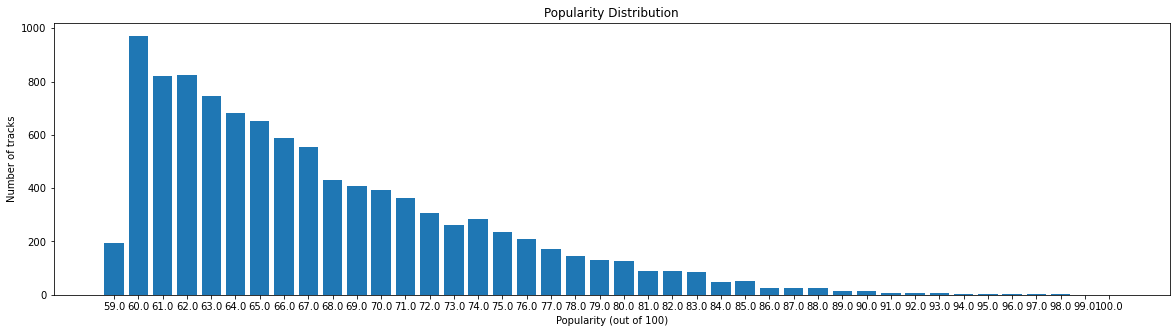

In [48]:
importlib.reload(myutils)

popularity_column = spotify_table.get_column("popularity")
unique_popularities = sorted(myutils.get_unique_values(popularity_column))
frequencies = myutils.get_frequency_of_multiple_values(unique_popularities, popularity_column)
plotutils.simple_bar_chart(unique_popularities, frequencies, ["Popularity (out of 100)", "Number of tracks", "Popularity Distribution"])

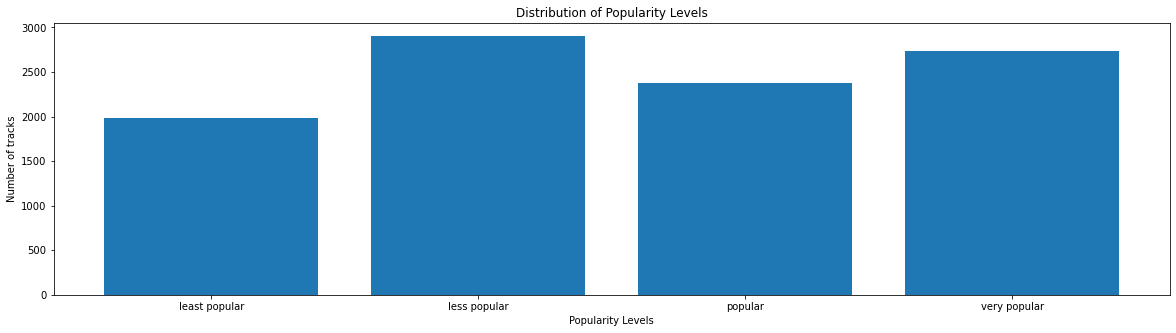

In [59]:
importlib.reload(myutils)

cutoffs = myutils.compute_equal_frequency_cutoffs(sorted(popularity_column), 4)
discretized_popularities = myutils.discretize_with_cut_offs(popularity_column, cutoffs)
unique_discretized_popularities = sorted(myutils.get_unique_values(discretized_popularities))
frequencies_discretized_popularities = myutils.get_frequency_of_multiple_values(unique_discretized_popularities, discretized_popularities)
plotutils.simple_bar_chart(unique_discretized_popularities, frequencies_discretized_popularities, ["Popularity Levels", \
    "Number of tracks", "Distribution of Popularity Levels"])

In [77]:
importlib.reload(myutils)
importlib.reload(myclassifiers)

X_data = [[instance[spotify_table.column_names.index("track_genre")]] for instance in spotify_table.data]
print(X_data[:20])
nb_accuracy = 0
nb_predictions, y_actual = [], []
skfold_splits = myutils.strat_cross_val_predict(10, X_data, discretized_popularities, 10)
for skfold_split in skfold_splits:
    for split in skfold_split:
        nb_clf = MyKNeighborsClassifier()
        nb_clf.fit(split[0], split[2])
        predictions_naive = nb_clf.predict(split[1])
        nb_accuracy += myevaluation.accuracy_score(split[3], predictions_naive)
        y_actual += split[3]
        nb_predictions += predictions_naive


[['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic'], ['acoustic']]


AttributeError: module 'mysklearn.myutils' has no attribute 'confusion_matrix_values'

In [78]:
importlib.reload(myutils)

print("Naive Bayes classifier: accuracy =", nb_accuracy/100, ", error rate =", 1 - nb_accuracy/100, \
    "\n\tprecision rate =", myevaluation.binary_precision_score(y_actual, nb_predictions), \
    ", recall = ", myevaluation.binary_recall_score(y_actual, nb_predictions), \
    ", F1 = ", myevaluation.binary_f1_score(y_actual, nb_predictions))

Naive Bayes classifier: accuracy = 0.23560000000000023 , error rate = 0.7643999999999997 
	precision rate = 0.2286984440602618 , recall =  0.9329974811083124 , F1 =  0.3673509868094813
